In [2]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib as plt
import wordcloud as wc
import re

tweets = pd.read_csv('train.csv')
tweets.head()

     |████████████████████████████████| 364 kB 699 kB/s eta 0:00:01


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
def getStringFromSeries(series):
    string = ""
    for i in series:
        string = string + " " + i
    return string

In [4]:
dostweets = tweets.iloc[[1,2],:]
dostweets.head()

,id,keyword,location,text,target
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [5]:
getStringFromSeries(dostweets['text'])

" Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [118]:
tweetsCatastrofe = tweets.loc[tweets['target'] == 1]

In [119]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']))

(-0.5, 399.5, 199.5, -0.5)

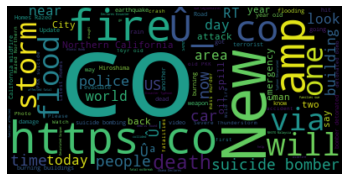

In [120]:
plt.pyplot.imshow(wordcloud,interpolation = "bilinear")
plt.pyplot.axis("off")

In [121]:
tweetsNoTarget = tweets.loc[tweets['target'] == 0]

(-0.5, 399.5, 199.5, -0.5)

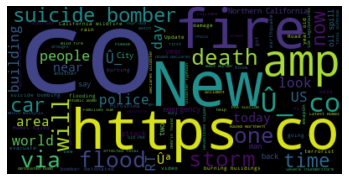

In [122]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']))
plt.pyplot.imshow(wordcloud,interpolation = 'bilinear')
plt.pyplot.axis('off')

In [123]:
#Me llama mucho la atencion que aparecen mucho las palabras co y https
#Voy a ver que onda esos tweets
tweets_https = tweets.loc[tweets['text'].str.contains('https')]
tweets_https.shape

(407, 5)

In [124]:
tweets_https.head()

,id,keyword,location,text,target
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0
62,89,ablaze,Twitter Lockout in progress,Rene Ablaze &amp; Jacinta - Secret 2k13 (Falle...,0
68,97,accident,"Nashville, TN",Accident on I-24 W #NashvilleTraffic. Traffic ...,1
71,102,accident,"St. Louis, MO",#stlouis #caraccidentlawyer Speeding Among Top...,0
76,110,accident,Norf Carolina,'By accident' they knew what was gon happen ht...,0


In [125]:
tweets_https['target'].sum()

134

In [126]:
sample = tweets_https.sample()
sample['text'].iloc[0]

'@KristyLeeMusic brings her Alabama thunder back to the Attic SEPTEMBER 26! Tickets: https://t.co/B7ZwEVsrGO'

In [127]:
sample['target']

6675    0
Name: target, dtype: int64

In [128]:
tweets_https.loc[5496]

id                                                       7843
keyword                                            quarantine
location                                                  NaN
text        Reddit Will Now Quarantine OffensiveåÊContent ...
target                                                      0
Name: 5496, dtype: object

In [129]:
#Despues de samplear un poco, decidi sacar los tweets que tienen https, porque me ensuciaban el wordcloud
tweets = tweets.loc[~(tweets['text'].str.contains('https'))]
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [130]:
tweetsCatastrofe = tweets.loc[tweets['target'] == 1]
tweetsNoTarget = tweets.loc[tweets['target'] == 0]

(-0.5, 399.5, 199.5, -0.5)

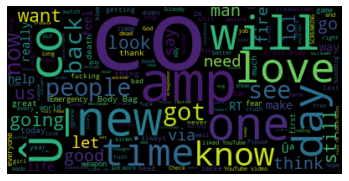

In [131]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']))
plt.pyplot.imshow(wordcloud,interpolation = 'bilinear')
plt.pyplot.axis('off')

(-0.5, 399.5, 199.5, -0.5)

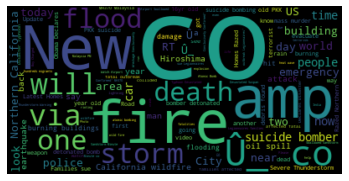

In [132]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']))
plt.pyplot.imshow(wordcloud,interpolation = 'bilinear')
plt.pyplot.axis('off')

In [133]:
#Ahora aprece mucho CO, vamos a ver eso que onda
tweets_co = tweets.loc[tweets['text'].str.contains('co')]
tweets_co.shape

(4273, 5)

(-0.5, 399.5, 199.5, -0.5)

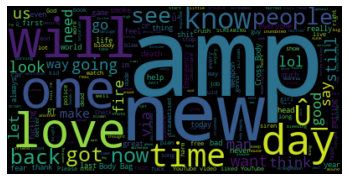

In [134]:
#Puf son una banda, no puedo solo sacarlos. Lo que voy a hacer es eliminar co del string de donde armo el wordcloud
#Pues me parece que solo ensucia al wordcloud
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']).replace("co",""))
plt.pyplot.imshow(wordcloud,interpolation = 'bilinear')
plt.pyplot.axis('off')

(-0.5, 399.5, 199.5, -0.5)

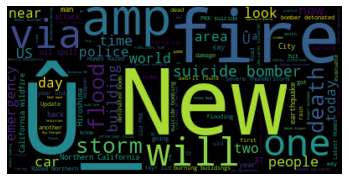

In [135]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']).replace("co",""))
plt.pyplot.imshow(wordcloud,interpolation = 'bilinear')
plt.pyplot.axis('off')

In [136]:
#Me intriga "amp" todavia
tweets_amp = tweets.loc[tweets['text'].str.contains('amp')]
tweets_amp.shape

(395, 5)

In [137]:
tweets_amp.sample()['text'].iloc[0]

'\x89ÛÏYou see the devastation &amp; it\x89Ûªs shocking.\x89ÛÏ  Firefighters continue to battle flames in California. benstracy reports \x89Û_'

(-0.5, 399.5, 199.5, -0.5)

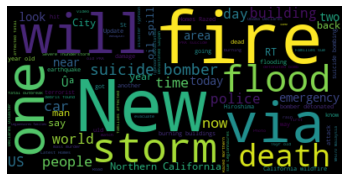

In [141]:
#Ok amp tiene que ver con el caracter &, tambien lo voy a sacar del wordcloud
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']).replace("co","").replace("amp","").replace("Û_",""))
plt.pyplot.imshow(wordcloud,interpolation = 'bilinear')
plt.pyplot.axis('off')

(-0.5, 399.5, 199.5, -0.5)

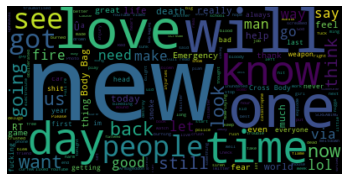

In [142]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']).replace("co","").replace("amp","").replace("Û_",""))
plt.pyplot.imshow(wordcloud,interpolation = 'bilinear')
plt.pyplot.axis('off')